In [41]:
import pandas as pd
import matplotlib.ticker as ticker


In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn import preprocessing

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.metrics import r2_score

In [8]:
covid19=pd.read_csv('C:/Users/MK_PC/Desktop/Corona Virus Case Study/covid_19_data.csv')

In [10]:
covid19.describe()

,SNo,Confirmed,Deaths,Recovered
count,7313.000000,7313.000000,7313.000000,7313.000000
mean,3657.000000,623.016409,21.145494,231.619171
std,2111.225592,4914.340881,213.643556,2634.378848
min,1.000000,0.000000,0.000000,0.000000
25%,1829.000000,2.000000,0.000000,0.000000
50%,3657.000000,15.000000,0.000000,0.000000
75%,5485.000000,120.000000,1.000000,10.000000
max,7313.000000,67800.000000,4032.000000,58382.000000


In [11]:
covid19['ObservationDate']=pd.to_datetime(covid19['ObservationDate'])


In [14]:
country=covid19.groupby(['Country/Region'])[['Confirmed','Recovered','Deaths']].sum()

In [15]:
top_5=country.nlargest(5,['Confirmed'])

In [18]:
plt.figure(figsize=(20,15))


<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

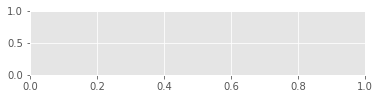

In [19]:
plt.subplot(311)

Text(0.5, 1.0, 'Covid 19 Top 5 Countries - Confirmed, Recovered and Death cases')

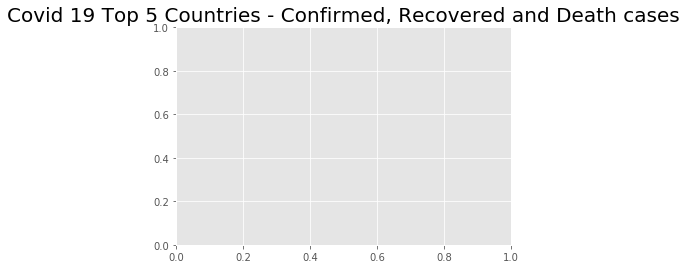

In [21]:
plt.title('Covid 19 Top 5 Countries - Confirmed, Recovered and Death cases',fontsize=20)

Text(0.5, 0, 'Confirmed')

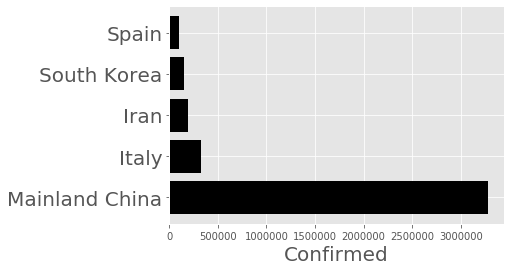

In [37]:
#Confirmed Cases

plt.barh(top_5.index,top_5['Confirmed'],color='black')
plt.yticks(fontsize=20)
plt.xlabel('Confirmed',fontsize=20)


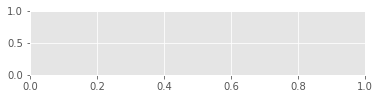

In [32]:
plt.subplot(312)


Text(0.5, 0, 'Deaths')

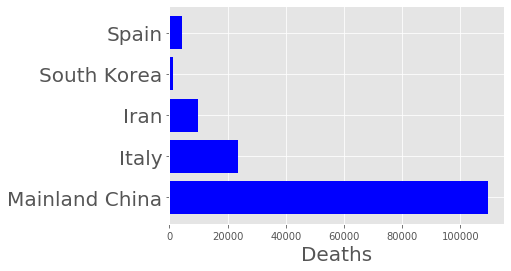

In [36]:
#Deaths

plt.barh(top_5.index,top_5['Deaths'],color='blue')
plt.yticks(fontsize=20)
plt.xlabel('Deaths',fontsize=20)


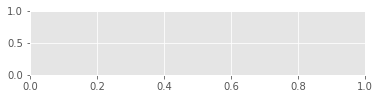

In [38]:
plt.subplot(313)


Text(0.5, 0, 'Recovered')

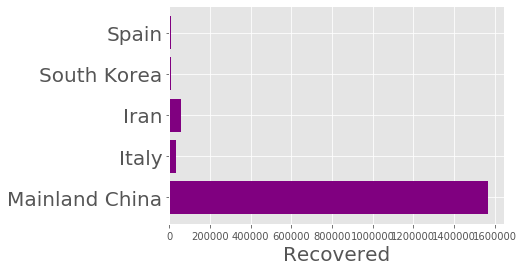

In [40]:
#Recovered from covid

plt.barh(top_5.index,top_5['Recovered'],color='purple')
plt.yticks(fontsize=20)
plt.xlabel('Recovered',fontsize=20)

In [42]:
#Bar Chart

covid19['day']=covid19['ObservationDate'].dt.day

In [43]:
cv1=covid19[covid19['ObservationDate']>'2020-03']


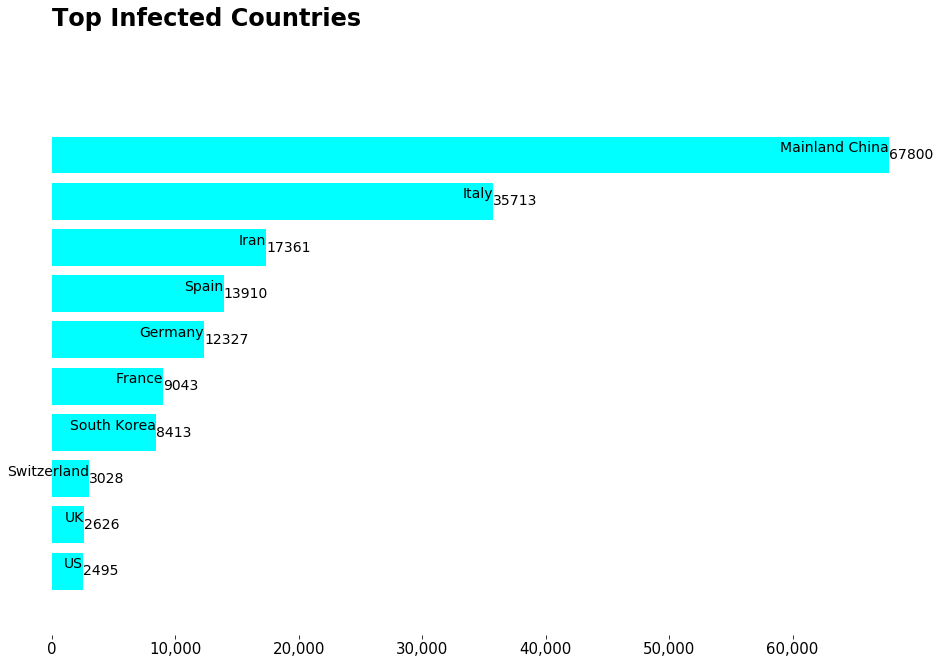

In [50]:
fig, ax=plt.subplots(figsize=(15,10))

def draw_barchart(date):
    df=cv1[cv1['day'].eq(date)].sort_values(by='Confirmed',ascending=True).tail(10)
    ax.clear()
    ax.text(0,1.12,'Top Infected Countries',size=24,weight=600,transform=ax.transAxes,ha='left')
    ax.barh(df['Country/Region'],df['Confirmed'],color='aqua')
    for i, (country,value) in enumerate(zip(df['Country/Region'],df['Confirmed'])):
        ax.text(value,i, country, size=14, ha='right',va='bottom')
        ax.text(value,i,f'{value:.0f}', size=14, ha='left',va='center')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}')) 
    ax.set_yticks([])
    ax.set_axisbelow(True)
    ax.margins(0,0.1)
    ax.tick_params(axis='x',labelsize=15,colors='black')
    ax.grid(which='major',axis='x',linestyle='--')
    plt.box(False) 
draw_barchart(18)

In [51]:
#Pie Chart

In [52]:
rank1=country.nlargest(179,['Confirmed']).head(20)

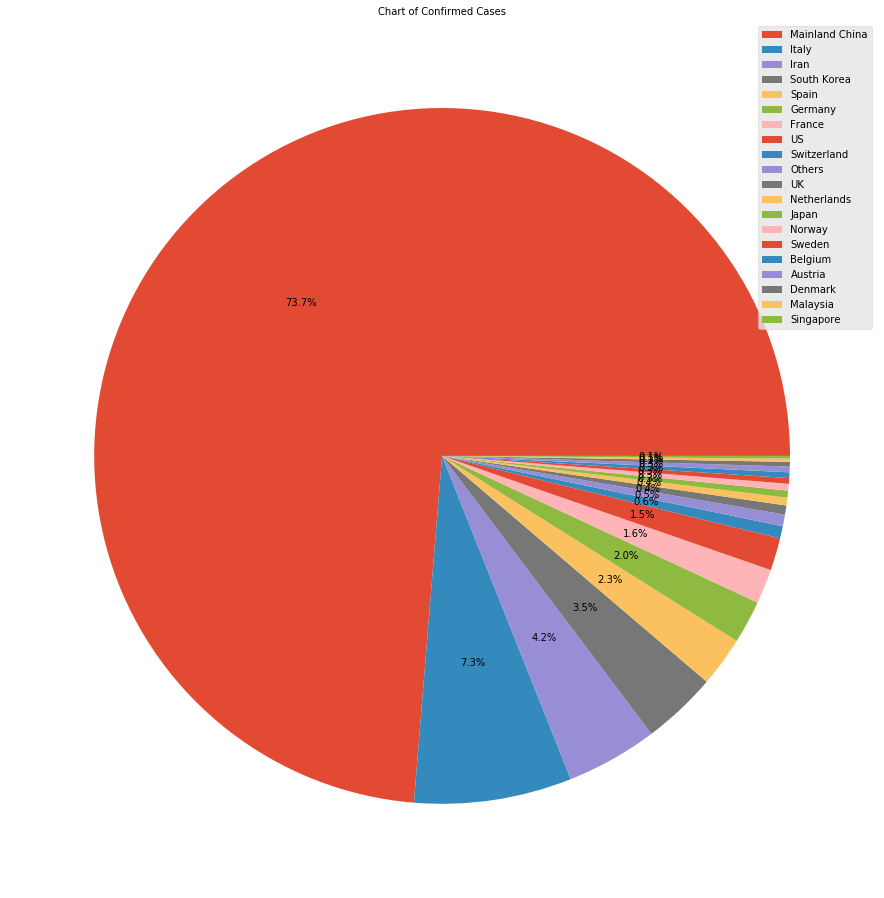

In [67]:
confirmed_perc=[]
for i in rank1['Confirmed']:
    confirmed_perc.append(i/rank1['Confirmed'].sum())
plt.figure(figsize=(16,16))    
plt.title('Chart of Confirmed Cases',fontsize=10)    
plt.pie(confirmed_perc,autopct='%1.1f%%')
plt.legend(rank1.index,loc='best')
plt.show()    


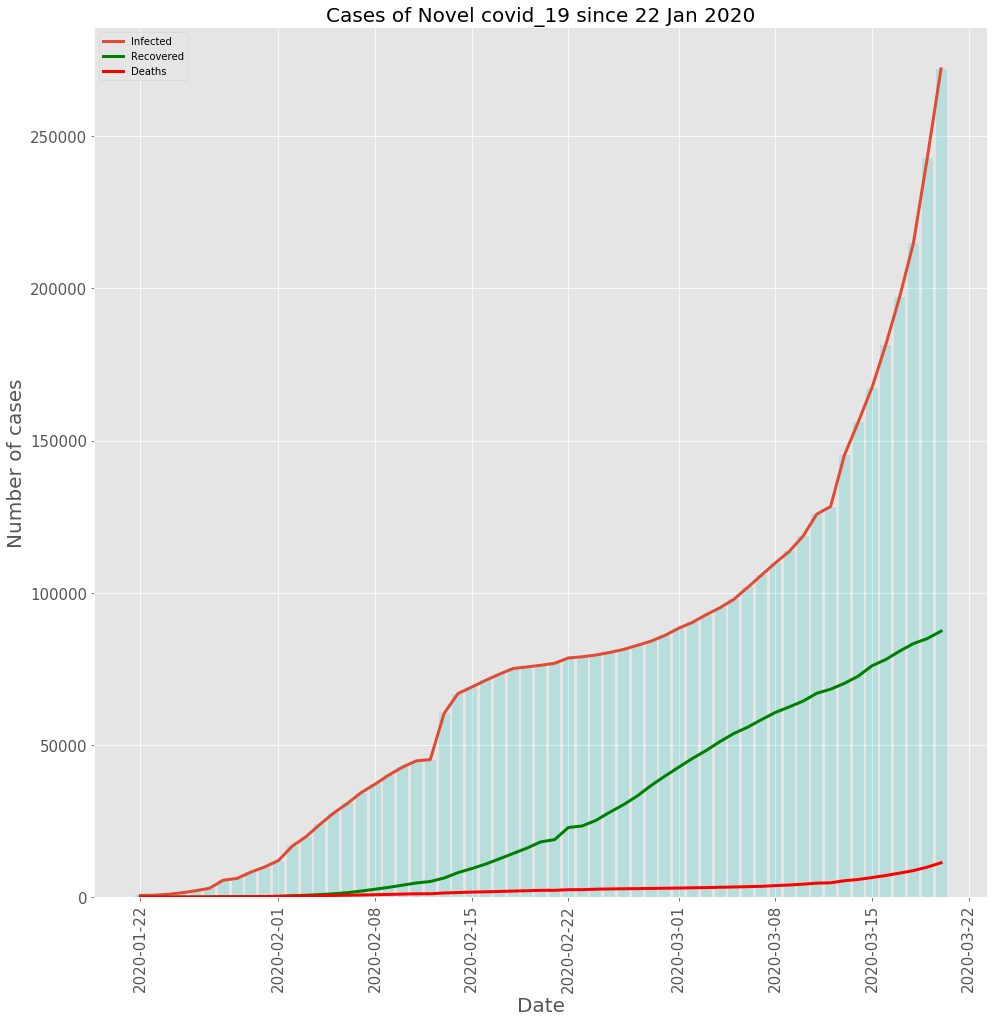

In [93]:
df=covid19.groupby(['ObservationDate'])[['Confirmed','Recovered','Deaths']].sum()
plt.figure(figsize=(16,16))

#title
plt.title('Cases of Novel covid_19 since 22 Jan 2020',fontsize=20)

#x and y axis label
plt.xlabel('Date',fontsize=20)
plt.ylabel('Number of cases',fontsize=20)

plt.plot(df.index,df['Confirmed'],label='Infected',linewidth=3)
plt.plot(df.index,df['Recovered'],label='Recovered',linewidth=3,color='green')
plt.plot(df.index,df['Deaths'],label='Deaths',linewidth=3,color='red')
plt.bar(df.index,df['Confirmed'],alpha=0.2,color='c')

plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)

plt.style.use('ggplot')
plt.legend()